#Deep learning for roof segmentation from satellite images.
In this project, a few images are given, around 25 images from satellites, with the corresponding labels, and 5 images without labels for validation.
I used a custom model from Unet for this task, and I used "tanh" as an activation function.

# 1.0 - Upload the dataset to google drive.
To make sure this notebook will work correctly you have to upload the dataset to your google drive and then connect google drive with google colab. other than that you have to modify the direction of the dataset.
Then unzip the dataset.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/dida/dida_test_task.zip

Archive:  /content/drive/MyDrive/dida/dida_test_task.zip
   creating: images/
  inflating: images/121.png          
   creating: __MACOSX/
   creating: __MACOSX/images/
  inflating: __MACOSX/images/._121.png  
  inflating: images/241.png          
  inflating: __MACOSX/images/._241.png  
  inflating: images/270.png          
  inflating: __MACOSX/images/._270.png  
  inflating: images/272.png          
  inflating: __MACOSX/images/._272.png  
  inflating: images/274.png          
  inflating: __MACOSX/images/._274.png  
  inflating: images/278.png          
  inflating: __MACOSX/images/._278.png  
  inflating: images/284.png          
  inflating: __MACOSX/images/._284.png  
  inflating: images/287.png          
  inflating: __MACOSX/images/._287.png  
  inflating: images/300.png          
  inflating: __MACOSX/images/._300.png  
  inflating: images/301.png          
  inflating: __MACOSX/images/._301.png  
  inflating: images/303.png          
  inflating: __MACOSX/images/._303.png  


## 1.1 - Import the important libraries and read the dataset.

In [3]:
import glob
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
%matplotlib inline

In [4]:
path_images = "/content/images"
path_labels = "/content/labels"

In [5]:
images_png = glob.glob(path_images+"/*.png")
labels_png = glob.glob(path_labels+"/*.png")
images = [images_png]
labels = [labels_png]

Compare the number of images to the number of labels.

In [6]:
num_images = len(images_png) 
num_labels = len(labels_png) 

print("number of images: ", num_images)
print("number of labels: ", num_labels)
print("Is number of images is the same as number of labels? " + str(num_images==num_labels))

number of images:  30
number of labels:  25
Is number of images is the same as number of labels? False


## 1.2 - Connect each image in the dataset with the corresponding label. 

In [7]:
names_images_png = np.zeros(len(images_png))
 
for i in range (0, len(images_png)): 
    names_images_png[i] = int(images_png[i][len("./content/images"):-4]) # Ignore the last 4 characters (.png)

names_labels_png = np.zeros(len(labels_png))
 
for i in range (0, len(labels_png)): 
    names_labels_png[i] = int(labels_png[i][len("./content/labels"):-4]) # Ignore the last 4 characters (.png)

In [8]:
intersect_names, index_images, index_labels = np.intersect1d(names_images_png, names_labels_png, return_indices=True)

In [9]:
collated_images_and_labels = []

for i in range(0, len(intersect_names)):
    collated_images_and_labels.append(("/content/images/"+str(int(intersect_names[i]))+".png", "/content/labels/"+str(int(intersect_names[i]))+".png"))

print(collated_images_and_labels)

[('/content/images/121.png', '/content/labels/121.png'), ('/content/images/241.png', '/content/labels/241.png'), ('/content/images/270.png', '/content/labels/270.png'), ('/content/images/272.png', '/content/labels/272.png'), ('/content/images/274.png', '/content/labels/274.png'), ('/content/images/278.png', '/content/labels/278.png'), ('/content/images/284.png', '/content/labels/284.png'), ('/content/images/287.png', '/content/labels/287.png'), ('/content/images/300.png', '/content/labels/300.png'), ('/content/images/301.png', '/content/labels/301.png'), ('/content/images/303.png', '/content/labels/303.png'), ('/content/images/308.png', '/content/labels/308.png'), ('/content/images/314.png', '/content/labels/314.png'), ('/content/images/315.png', '/content/labels/315.png'), ('/content/images/317.png', '/content/labels/317.png'), ('/content/images/320.png', '/content/labels/320.png'), ('/content/images/324.png', '/content/labels/324.png'), ('/content/images/328.png', '/content/labels/32

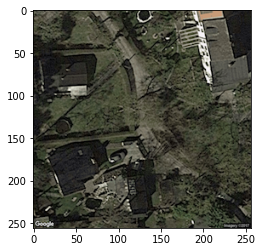

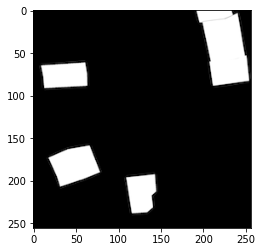

In [10]:
plt.imshow(Image.open(collated_images_and_labels[6][0]))
plt.figure()
plt.imshow(Image.open(collated_images_and_labels[6][1]), cmap="gray")

Read the images as an array that will be used for Augmentor.

In [11]:
images = [[np.asarray(Image.open(y)) for y in x] for x in collated_images_and_labels]

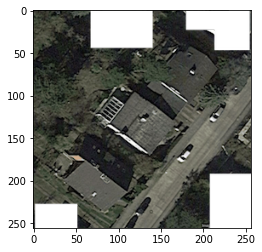

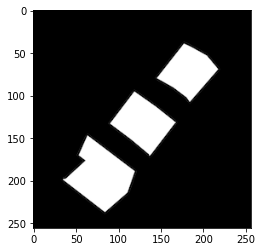

In [12]:
plt.imshow(images[10][0])
plt.figure()
plt.imshow(images[10][1], cmap="gray")

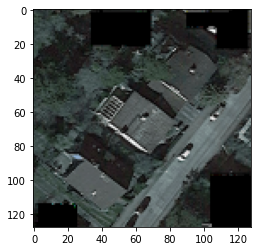

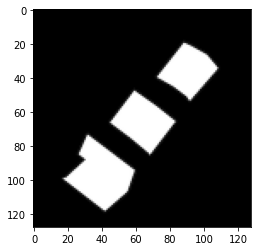

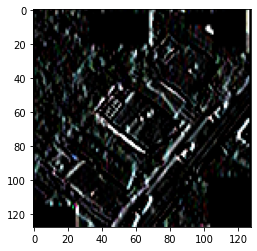

In [13]:
import cv2

img1 = cv2.resize(cv2.imread(collated_images_and_labels[10][0]), dsize=(128,128))
plt.imshow(img1)

plt.figure()
img2 = cv2.resize(cv2.imread(collated_images_and_labels[10][1]), dsize=(128,128))
plt.imshow(img2)

img_1 = cv2.Sobel(img1,cv2.CV_8U,1,0)

plt.figure()
plt.imshow(img_1)

# 2.0 - Increase the size of the dataset.
As I mentioned that, the dataset is very small, so I used the Augmentor model in order to increase it.

In [14]:
!pip install Augmentor
import Augmentor
p = Augmentor.DataPipeline(images)

 Randomly crop and rotate the images.

In [15]:

p.rotate(probability=1, max_left_rotation=25, max_right_rotation=25)

p.rotate_random_90(probability=1)

In [16]:
# Here I sample 1000 images.

num_samples = int(1000)

augmented_data = p.sample(num_samples)

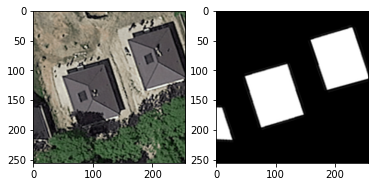

In [17]:
r_index = np.random.randint(0, len(augmented_data)-1)
f, axarr = plt.subplots(1, 2)
axarr[0].imshow(augmented_data[r_index][0])
axarr[1].imshow(augmented_data[r_index][1], cmap="gray")

Modify the shape of input and the output data from Augmentor to fit with Unet model.

In [18]:
num_channels_inp = 4 
num_channels_out = 1
img_size_x = 256
img_size_y = 256

input_data = np.zeros((num_samples, img_size_x, img_size_y, num_channels_inp))
output_data = np.zeros((num_samples, img_size_x, img_size_y, num_channels_out))

for i in range(0, num_samples):
    input_data[i, :, :, :] = augmented_data[i][0]
    output_data[i, :, :, :] = np.reshape(augmented_data[i][1],(img_size_x, img_size_y, num_channels_out))

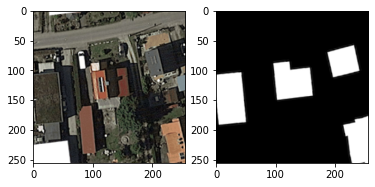

In [19]:
r_index = np.random.randint(0, len(augmented_data)-1)
f, axarr = plt.subplots(1, 2)
axarr[0].imshow(np.uint8(input_data[r_index,:,:,:]))
grayscale_output_data = np.squeeze(output_data)
axarr[1].imshow(grayscale_output_data[r_index], cmap="gray")

# 3.0 - Import the important libraries for the trainig.

In [20]:
!pip install keras-unet
import os
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from keras_unet.models import custom_unet
from keras_unet.utils import plot_segm_history
import numpy as np


-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


Normalize the data.

In [21]:
input_data = input_data[:,:,:,0:3]/255.0
output_data = output_data/255.0

In [22]:
num_sample = input_data.shape[0]

id_selected = np.random.choice(np.arange(num_sample),size = int(20/100*num_sample),replace=False)
id_else = np.setdiff1d(np.arange(num_sample),id_selected)

input_val = input_data[id_selected,:,:,:]
input_train = input_data[id_else,:,:,:]

output_val = output_data[id_selected,:,:]
output_train = output_data[id_else,:,:]

print(np.shape(input_val))
print(np.shape(input_train))
print(np.shape(output_val))
print(np.shape(output_train))

(200, 256, 256, 3)
(800, 256, 256, 3)
(200, 256, 256, 1)
(800, 256, 256, 1)


## 3.1 - Building up a custom unet model.
Building up the unet model and modifying the shape to match the same shape of the input data. Also, I used "tanh" as an activation function.

In [23]:
img_size_x = 256
img_size_y = 256

num_channels_inp = 3

model = custom_unet(
    input_shape=(img_size_x, img_size_y, num_channels_inp),
    use_batch_norm=False,
    num_classes=1,
    filters=8,
    dropout=0.1,
    activation='tanh',
    output_activation='tanh')

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 8)  224         ['input_1[0][0]']                
                                                                                                  
 spatial_dropout2d (SpatialDrop  (None, 256, 256, 8)  0          ['conv2d[0][0]']                 
 out2D)                                                                                           
                                                                                              

## 3.2 - Training the model.
I used the parameters as follows:
1. The number of epoch = 100
2. The batch size = 32
3. The hyperparameter learning rate = 0.001

Also, I used "Mean square error" to evaluate the loss.

In [24]:
num_epoch = 100
batch_size = 32
learning_rate = 0.001

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss=['MSE'], metrics=['MSE'])

history = model.fit(input_train, output_train, batch_size=batch_size, epochs=num_epoch,
 validation_data=(input_val, output_val))

Epoch 1/100
25/25 [==============================] - 32s 529ms/step - loss: 0.1601 - MSE: 0.1601 - val_loss: 0.1360 - val_MSE: 0.1360
Epoch 2/100
25/25 [==============================] - 12s 475ms/step - loss: 0.1375 - MSE: 0.1375 - val_loss: 0.1268 - val_MSE: 0.1268
Epoch 3/100
25/25 [==============================] - 12s 488ms/step - loss: 0.1282 - MSE: 0.1282 - val_loss: 0.1145 - val_MSE: 0.1145
Epoch 4/100
25/25 [==============================] - 12s 480ms/step - loss: 0.1158 - MSE: 0.1158 - val_loss: 0.1015 - val_MSE: 0.1015
Epoch 5/100
25/25 [==============================] - 12s 477ms/step - loss: 0.1122 - MSE: 0.1122 - val_loss: 0.1139 - val_MSE: 0.1139
Epoch 6/100
25/25 [==============================] - 12s 478ms/step - loss: 0.1059 - MSE: 0.1059 - val_loss: 0.0946 - val_MSE: 0.0946
Epoch 7/100
25/25 [==============================] - 12s 477ms/step - loss: 0.1028 - MSE: 0.1028 - val_loss: 0.0931 - val_MSE: 0.0931
Epoch 8/100
25/25 [==============================] - 12s 477ms

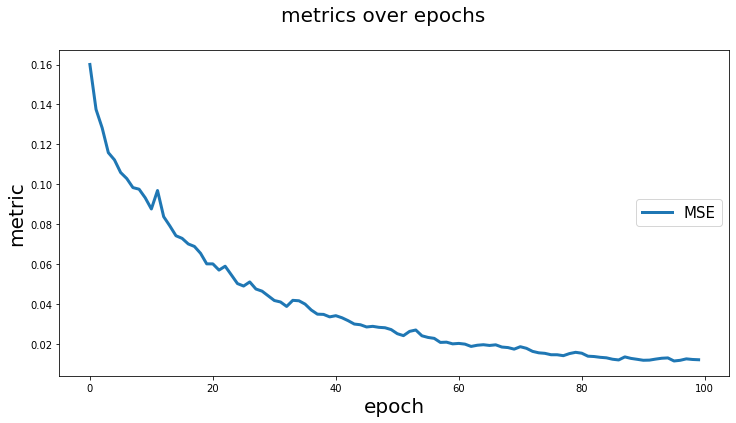

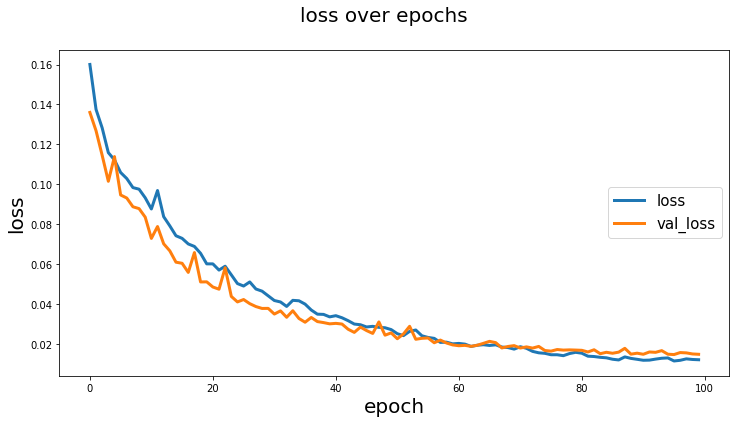

In [25]:
plot_segm_history(
    history, 
    metrics=['MSE'], 
    losses=['loss', 'val_loss'])

# 4.0 - Testing the model.

In [26]:
predict = model.predict(input_val)
# I modified the shape here to match the grayscale plots.
predict = np.squeeze(predict)


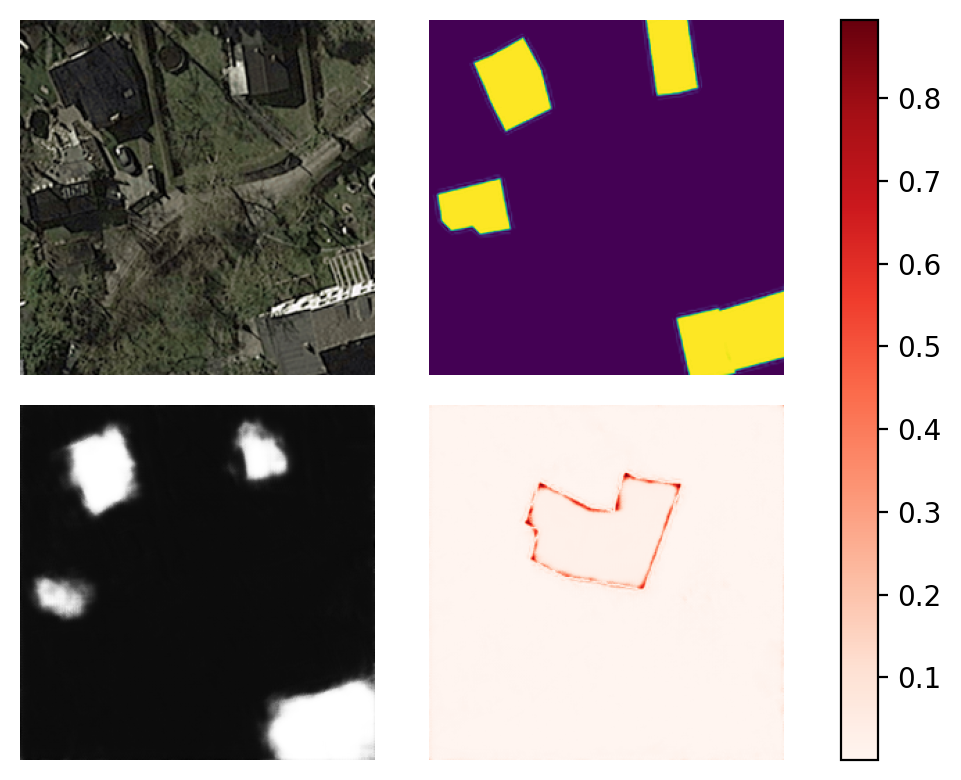

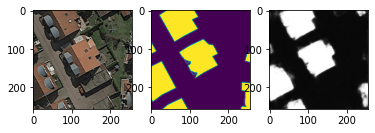

In [32]:
fig, ax = plt.subplots(2,2, dpi=200)
ax[0][0].imshow(input_val[3])
ax[0][0].set_axis_off()
grayscale_output_val = np.squeeze(output_val)
ax[0][1].imshow(grayscale_output_val[3])
ax[0][1].set_axis_off()
ax[1][0].imshow(predict[3], cmap='gray')
ax[1][0].set_axis_off()
img_temp = ax[1][1].imshow(abs(predict[0]-grayscale_output_val[0]), cmap='Reds')
ax[1][1].set_axis_off()
plt.tight_layout()
plt.colorbar(img_temp, ax=ax)

fig, ax = plt.subplots(1,3)
ax[0].imshow(input_val[10])
ax[1].imshow(grayscale_output_val[10])
ax[2].imshow(predict[10], cmap='gray')

In [28]:
model.evaluate(input_val, grayscale_output_val)

7/7 [==============================] - 1s 141ms/step - loss: 0.0147 - MSE: 0.0147


[0.01471991278231144, 0.01471991278231144]

# 5.0 - Save the model for later uses.

In [29]:
directory_model = 'saved_model'
model.save(directory_model, save_format='tf')

INFO:tensorflow:Assets written to: saved_model/assets
